In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
# 1. Load the dataset
df = pd.read_csv("emails.csv")  # Replace with your CSV file path
print("Dataset shape:", df.shape)  # Should be (5172, 3002)

Dataset shape: (5172, 3002)


In [11]:
# 2. Prepare features and target
X = df.iloc[:, 1:-1]   # Columns 2 to 3001 → word counts
y = df.iloc[:, -1]     # Last column → label (1 = spam, 0 = not spam)

In [12]:
# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# 4. K-Nearest Neighbors Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [14]:
# 5. Support Vector Machine Model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [17]:
# 6. Evaluate models
def evaluate(model_name, y_true, y_pred):
    print(f"\n{model_name} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))

    # Compute Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", cm)

    # --- Seaborn Heatmap ---
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Pred 0", "Pred 1"],
                yticklabels=["Actual 0", "Actual 1"])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.tight_layout()
    plt.show()

    print("Classification Report:\n", classification_report(y_true, y_pred))


K-Nearest Neighbors Performance:
Accuracy: 0.8685990338164251
Confusion Matrix:
 [[652  87]
 [ 49 247]]


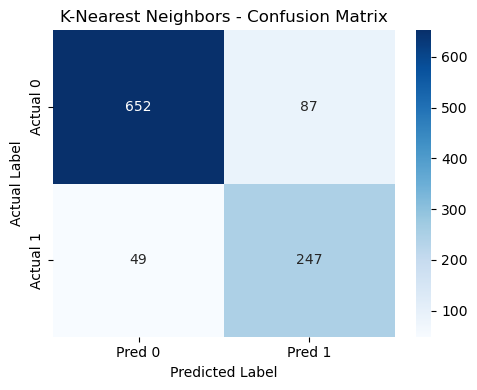

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.91       739
           1       0.74      0.83      0.78       296

    accuracy                           0.87      1035
   macro avg       0.83      0.86      0.84      1035
weighted avg       0.88      0.87      0.87      1035


Support Vector Machine Performance:
Accuracy: 0.9594202898550724
Confusion Matrix:
 [[715  24]
 [ 18 278]]


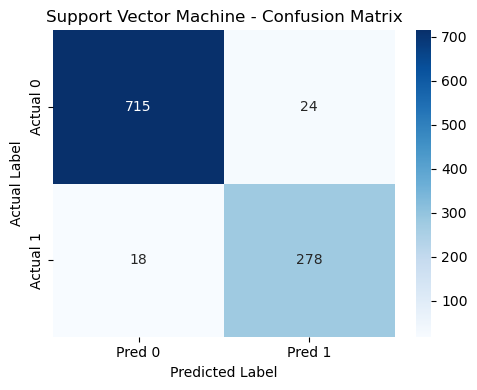

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       739
           1       0.92      0.94      0.93       296

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035



In [18]:
evaluate("K-Nearest Neighbors", y_test, y_pred_knn)
evaluate("Support Vector Machine", y_test, y_pred_svm)